In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from random import shuffle

import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv("./clean_data/fully_merged_data.csv")
df = df.dropna()

arr = df.index[df["fel_misd"] == ' ']
df = df.drop(arr, axis=0)
arr = df.index[df["fel_misd"] == '\xa0']
df = df.drop(arr, axis=0)

from scipy.stats import zscore

need_norm = ["age","MEDHINC_CY", "WLTHINDXCY", "TOTHH_CY"]
norm = df[need_norm].apply(zscore)

df[need_norm] = norm

df

,sex,age,day,month,MEDHINC_CY,WLTHINDXCY,time_arr,TOTHH_CY,fel_misd
0,M,-1.007650,4,0,-0.795643,-0.502892,2310,-0.442905,M
1,M,-1.007650,4,0,-0.795643,-0.502892,2310,-0.442905,M
2,M,-0.759528,5,0,-0.788811,-0.373469,16,-0.405740,M
3,M,-0.759528,5,0,-0.788811,-0.373469,16,-0.405740,M
4,M,-1.007650,4,0,-0.795643,-0.502892,2310,-0.442905,M
...,...,...,...,...,...,...,...,...,...
68072,M,-0.759528,6,11,0.016459,-0.200905,358,0.379188,M
68073,F,1.308155,2,1,-1.180260,-0.804879,809,0.892067,M
68074,M,-0.924942,4,2,-0.395335,-0.157764,1527,1.427244,M
68075,M,-0.924942,4,2,-0.395335,-0.157764,1527,1.427244,M


In [3]:
df["fel_misd"].value_counts()

M    46803
F    16407
C     2194
S      240
P       50
Name: fel_misd, dtype: int64

In [4]:
data = df["fel_misd"].value_counts()
median = np.percentile(data, 50)
iqr = stats.iqr(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
print(f"{median=}\n{q1=}\n{q3=}\n{iqr=}")
print(f"Lower outliers: {q1-1.5*iqr}")
print(f"Upper outliers: {q3+1.5*iqr}")

median=2194.0
q1=240.0
q3=16407.0
iqr=16167.0
Lower outliers: -24010.5
Upper outliers: 40657.5


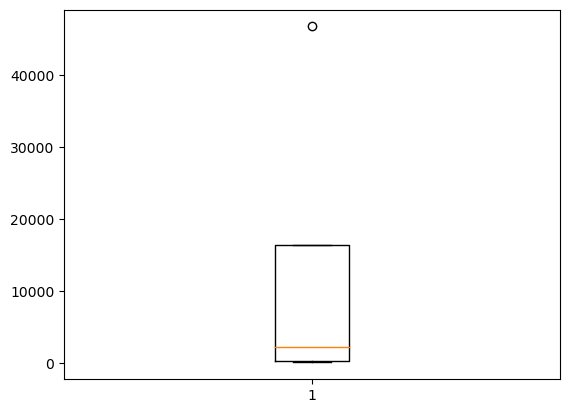

In [5]:
plt.boxplot(data);

In [6]:
m_arr = df.index[df["fel_misd"] == 'M'].tolist()
f_arr = df.index[df["fel_misd"] == 'F'].tolist()

shuffle(m_arr)
shuffle(f_arr)

In [10]:
temp = df.drop(m_arr[0:len(m_arr)-2194], axis = 0)
temp = temp.drop(f_arr[0:len(f_arr)-2194], axis = 0)
temp['fel_misd'].value_counts()

C    2194
F    2194
M    2194
S     240
P      50
Name: fel_misd, dtype: int64

In [11]:
data = temp["fel_misd"].value_counts()
median = np.percentile(data, 50)
iqr = stats.iqr(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
print(f"{median=}\n{q1=}\n{q3=}\n{iqr=}")
print(f"Lower outliers: {q1-1.5*iqr}")
print(f"Upper outliers: {q3+1.5*iqr}")

median=2194.0
q1=240.0
q3=2194.0
iqr=1954.0
Lower outliers: -2691.0
Upper outliers: 5125.0


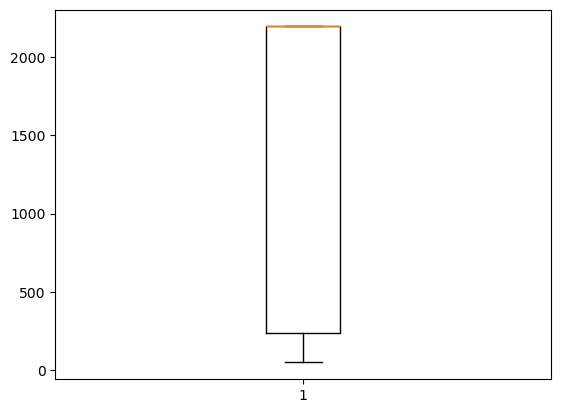

In [12]:
plt.boxplot(data);

In [29]:
def gen_rand_df(temp_df,samples=1):
    # Assume that temp_df is only populated with same fel_misd class and no one-hot 
    #     encoding
    # Age, MEDHINC_CY, WLTHINDXCY, time_arr, TOTHH_CY should be normalized prior
    #     to calling this function

    
    d = {}
    
    choices = temp_df['sex'].value_counts().index.to_list()
    v_c = temp_df['sex'].value_counts()
    probs = v_c/sum(v_c)
    d['sex'] = np.random.choice(choices, p=probs, size=samples)
    
    choices = temp_df['day'].value_counts().index.to_list()
    v_c = temp_df['day'].value_counts()
    probs = v_c/sum(v_c)    
    d['day'] = np.random.choice(choices, p=probs,size=samples)
    
    choices = temp_df['month'].value_counts().index.to_list()
    v_c = temp_df['month'].value_counts()
    probs = v_c/sum(v_c)    
    d['month'] = np.random.choice(choices, p=probs, size=samples)
    
    x = np.random.normal(0,1,size=(5,samples))
    d['age'] = x[0]
    d['MEDHINC_CY'] = x[1]
    d['WLTHINDXCY'] = x[2]
    d['time_arr'] = x[3]
    d['TOTHH_CY'] = x[4]
    d['fel_misd'] = [temp_df['fel_misd'].to_list()[0] for i in range(samples)]
    
    print(temp_df['fel_misd'].to_list()[0])
    df_return = pd.DataFrame.from_dict(d)

    
    return df_return
    
    

            
s_amt = (int) (0.5*240)  
p_amt = (int) (0.5*50)    
inp = temp[temp['fel_misd'] == 'S']
s_temp = gen_rand_df(inp,s_amt)

inp = temp[temp['fel_misd'] == 'P']
p_temp = gen_rand_df(inp,p_amt)

S
P


In [30]:
df = pd.concat([temp,s_temp,p_temp])
df['fel_misd'].value_counts()

C    2194
F    2194
M    2194
S     360
P      75
Name: fel_misd, dtype: int64